# Projet IA : voyageur de commerce
Marie Magny
Mickael Nabet
Maxime Boyer

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
import sys

In [2]:
def generate_graph(nbr_sommets=5, max_poids=10):
    graphe = nx.complete_graph(nbr_sommets)
    nx.set_edge_attributes(graphe, {e: {'weight': randint(1, max_poids)} for e in graphe.edges})
    return graphe

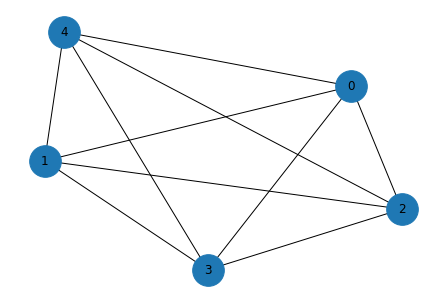

In [3]:
#visualisation
graphe = generate_graph()
nx.draw(graphe, with_labels=True, node_size=1000)
plt.show()

In [4]:
for t in graphe.edges(data=True):
    print(t)

(0, 1, {'weight': 5})
(0, 2, {'weight': 7})
(0, 3, {'weight': 6})
(0, 4, {'weight': 4})
(1, 2, {'weight': 5})
(1, 3, {'weight': 7})
(1, 4, {'weight': 10})
(2, 3, {'weight': 10})
(2, 4, {'weight': 3})
(3, 4, {'weight': 2})


In [5]:
from algorithmx.networkx import add_graph
from algorithmx import jupyter_canvas

canvas = jupyter_canvas()
add_graph(canvas, graphe)

JupyterWidget(events=['{"attrs": {"nodes": {"0": {}, "1": {}, "2": {}, "3": {}, "4": {}}}}', '{"attrs": {"edge…

https://algrx.github.io/docs/python/examples/networkx-tutorial.html

## A*

Dans un etat, il faut indiquer la ville actuelle ainsi que les autres villes où on est déjà passé
Il faut indiquer tous ces trucs (définir l'etat, les actions possibles, les résultats d'une action dans un état, quel est la condition de fin) pour avoir une bonne note

Spanning tree = heuristique avec sommets restants + sommet actuel + sommet départ

=> but est de choisir la bonne ville pour après dans A*

In [6]:
import sys

class AStar:
    def __init__(self, G):
        self.graphe = G
    
    def actions(self):
        return list(self.frontier.keys())
        
    def result(self, action):
        for l in list(graphe.edges(self.node, data=True)):
            if (l[1] == action):
                self.frontier[action] = self.g_n + l[2]['weight'] + self.result_mst(action)
                break

    def result_mst(self, action):
        mst_graph = nx.Graph()
        mst_graph.add_node(action)
        unexplored = list(self.frontier.keys())
        for j in range(len(self.frontier) - 1):
            mini = sys.maxsize
            i = -1
            for k in list(mst_graph.nodes()):
                for l in list(self.graphe.edges(k, data=True)):
                    if(l[2]["weight"] < mini and l[0] == k and l[1] not in list(mst_graph.nodes()) and l[1] in unexplored):
                        mini = l[2]["weight"]
                        i = l[1]
                    elif(l[2]["weight"] < mini and l[1] == k and l[0] not in list(mst_graph.nodes()) and l[0] in unexplored):
                        mini = l[2]["weight"]
                        i = l[0]
            unexplored.remove(i)
            mst_graph.add_weighted_edges_from([(0, i, mini)])
        total_weight = 0
        for e in list(mst_graph.edges(data=True)):
            total_weight += e[2]["weight"]
        return total_weight
    
    def initiate_frontier(self):
        self.frontier = {list(graphe.edges(self.node))[i][1]: list(graphe.edges(self.node, data=True))[i][2]['weight'] for i in range(graphe.number_of_nodes()-1)}
    
    def my_pop(self):
        mini = sys.maxsize
        i = -1
        for f in self.frontier.items():
            if f[1] < mini:
                mini = f[1]
                i = f[0]
        self.frontier.pop(i)
        for j in range(len(graphe.edges(self.node))):
            if(list(graphe.edges(self.node, data=True))[j][1] == i):
                self.g_n += list(graphe.edges(0, data=True))[j][2]['weight']
                break
        return i
    
    def solve(self):
        self.node = list(self.graphe.nodes)[0]
        self.initiate_frontier()
        self.explored = [self.node]
        self.g_n = 0
        for action in self.actions():
            self.result(action)
        while(len(self.frontier) > 0):
            self.node = self.my_pop()
            self.explored.append(self.node)
            for action in self.actions():
                self.result(action)
        self.explored.append(self.explored[0])
        self.g_n = nx.path_weight(self.graphe, self.explored, weight="weight")
        print("Le meilleur chemin avec l'algorithme A* est " + str(self.explored) + " ce chemin a une distance totale de " + str(self.g_n))

In [7]:
a_star = AStar(graphe)
a_star.solve()

Le meilleur chemin avec l'algorithme A* est [0, 4, 2, 1, 3, 0] ce chemin a une distance totale de 25


Nous avons trouvé une fonction dans networkx qui génère le minimum spanning tree étant donné un graphe. Elle nous a permis de vérifier que notre propre code pour générer cet arbre donnait le même résultat sur plusieurs instances différentes. Ci-dessous, un exemple de comment l'utiliser sur le graphe de départ.

In [8]:
mst_graph = nx.minimum_spanning_tree(graphe, weight='weight', algorithm='prim')

canvas = jupyter_canvas()
add_graph(canvas, mst_graph)

JupyterWidget(events=['{"attrs": {"nodes": {"0": {}, "1": {}, "2": {}, "3": {}, "4": {}}}}', '{"attrs": {"edge…

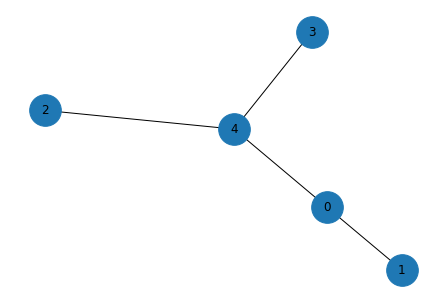

In [9]:
nx.draw(mst_graph, with_labels=True, node_size=1000)
plt.show()

### A* v2 -> to comment

In [10]:
class Etat:
    def __init__(self, pere, etat, distance):
        self.pere = pere
        self.etat = etat
        self.distance = distance #distance parcourue du début jusqu'à cet état -> g(n)
        
    def is_solved(self, graphe):
        path = self.liste_peres()
        if(set(path) == set(list(graphe.nodes()))):
            return True
        return False
    
    def liste_peres(self):
        e = self
        path = [e.etat]
        while(e.pere != -1):
            path.append(e.pere.etat)
            e = e.pere
        return path

class AStar2:
    def __init__(self, G):
        self.graphe = G.copy()
        #chemin + court le même peu importe le sommet de départ car boucle
        self.racine = Etat(-1, list(self.graphe.nodes)[0], 0)
        #frontier = dict(n, f(n))
        self.frontier = {self.racine: self.f(self.racine)}
        self.explored = []
    
    def f(self, n):
        return self.g(n) + self.heuristique(n)
    
    def g(self, n):
        e = n
        distance = e.distance
        while(e.pere != -1):
            e = e.pere
            distance += e.distance
        return distance
    
    def heuristique(self, n):
        G = self.graphe.copy()
        path = n.liste_peres()
        path.remove(0)
        for node in path:
            G.remove_node(node)
        mst_graph = nx.minimum_spanning_tree(G, weight='weight', algorithm='prim')
        distance = 0
        for edge in mst_graph.edges(data=True):
            distance += edge[2]["weight"]
        return distance
    
    def my_pop(self):
        mini = sys.maxsize
        i = -1
        for f in self.frontier.items():
            if f[1] < mini:
                mini = f[1]
                i = f[0]
        self.frontier.pop(i)
        return i
    
    def actions(self):
        actions = {}
        for edge in self.graphe.edges(self.racine.etat, data=True):
            if(edge[1] not in self.racine.liste_peres()):
                action = Etat(self.racine, edge[1], self.racine.distance + edge[2]["weight"])
                actions.update({action: self.f(action)})
        return actions
    
    def result(self, action, f_n):
        self.frontier.update({action: f_n})
    
    def solve(self):
        while(not self.racine.is_solved(self.graphe) and len(self.frontier) > 0):
            self.racine = self.my_pop()
            self.explored.append(self.racine)
            for action, f_n in self.actions().items():
                etat_in_front = []
                for etat_f in list(self.frontier.keys()):
                    etat_in_front.append(etat_f.etat)
                if(action.etat not in self.explored and action.etat not in etat_in_front):
                    self.result(action, f_n)
                elif(action.etat in etat_in_front): #màj dans frontier si action mieux que celle dans frontier
                    for key in self.frontier.keys():
                        if(key.etat == action.etat):
                            frontier_fn = self.frontier[key]
                            key_f = key
                            break
                    if(frontier_fn > f_n):
                        self.frontier.pop(key_f)
                        self.result(action, f_n)
        if(self.racine.is_solved(graphe)):
            e = self.racine
            path = self.racine.liste_peres()
            path.insert(0, 0)
            distance = nx.path_weight(self.graphe, path, weight="weight")
            #rajouter retour depart
            print("Le meilleur chemin avec l'algorithme A* est " + str(path) + " ce chemin a une distance totale de " + str(distance))

In [11]:
a_star2 = AStar2(graphe)
a_star2.solve()

Le meilleur chemin avec l'algorithme A* est [0, 1, 3, 2, 4, 0] ce chemin a une distance totale de 29


## Recherche locale : genetic algorithm

In [12]:
import numpy as np  

#definir le score de chaque chemin
def fitness(chemin):
    score = 0
    for i in range(len(chemin)-1):
        score += graphe[chemin[i]][chemin[i+1]]['weight']
    score += graphe[chemin[len(chemin)-1]][chemin[0]]['weight']
    return score 

#choix des reproducteurs : on prend ceux qui ont le meilleur score
#on prend 1/3 de la population pour la reproduction
def selection(pop):
    selec_pop = []
    scores = []
    for i in range(len(pop)):
        data = []
        data.append(i)
        data.append(fitness(pop[i]))
        scores.append(data)
    scores_tries = sorted(scores, key=lambda item:(item [1]))
    for i in range(round(len(pop)/3)):
        selec_pop.append(pop[scores_tries[i][0]])
    return selec_pop

#on prend au hasard un individu dans les sélectionnés pour être reproducteurs
def random_selec(pop):
    i = randint(0, len(pop)-1)
    return pop[i]

#on prend les caracteristiques du pere jusqu'au point de croisement ici (sommet/3)
def reproduce(pere, mere, graphe):
    point_crois = round(len(graphe.nodes)/3)
    child = []
    sommets = np.arange(len(graphe.nodes)) 
    for i in range(point_crois):
        child.append(pere[i])
        sommets = np.setdiff1d(sommets, pere[i])
    for i in range(point_crois, len(mere)):
        if(mere[i] in sommets):
            child.append(mere[i])
            sommets = np.setdiff1d(sommets, mere[i])
        else :
            s = sommets[randint(0, len(sommets)-1)]
            child.append(s)
            sommets = np.setdiff1d(sommets, s)
    return child

#on applique la mutation on inversant 2 sommets
def mutate(individu):
    i = randint(0, len(individu)-1)
    temp = individu[i]
    if(i+1==len(individu)):
        individu[i] = individu[0]
        individu[0] = temp
    else: 
        individu[i] = individu[i+1]
        individu[i+1] = temp
    return individu 

#size of the population : nbr sommet * nbr arretes
size_pop = len(graphe.nodes)*len(graphe.edges)
population = []

#generation de la population initiale  
for i in range(size_pop):
    sommets = np.arange(len(graphe.nodes)) 
    np.random.shuffle(sommets)
    chemin = sommets.tolist()
    population.append(chemin)

#evolution de la population
iterations = 0
while(iterations < 10):
    new_population = []
    selec_pop = selection(population)
    for i in range(size_pop):
        pere = random_selec(selec_pop)
        mere = random_selec(selec_pop)
        child = reproduce(pere, mere, graphe)
        proba_mutation = randint(1, 100)
        if(proba_mutation<10):
            child = mutate(child)
        new_population.append(child)
    population = new_population
    iterations += 1

#on prend le meilleur individu
meilleure_pop = selection(population)
#on sélectionne celui qui est en haut du classement 
print(meilleure_pop[0])
print(fitness(meilleure_pop[0]))

[0, 3, 4, 2, 1]
21
